# Classification with XGBoost
The short script aims to help acquaint with using XGBoost library for classification tasks

### What is XGBoost ?
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. It was designed for speed and performance. It is currently considered one of the best ML algorithm for structured or tabular data. 

For more info:
* https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d
* https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

## Step 1: Setup

#### Make sure to have XGBoost installed 
* conda install -c anaconda py-xgboost <b>OR</b>
* pip install xgboost

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Step 2: Load the Iris dataset

In [2]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris
from sklearn.datasets import load_iris

iris = load_iris()

print("Number of Samples: ", iris.data.shape[0])
print("Number of Features: ", iris.data.shape[1])
print("\nFeature Names: ", iris.feature_names)
print("Labels: ", iris.target_names)

Number of Samples:  150
Number of Features:  4

Feature Names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']


## Step 3:  Split the dataset

In [3]:
from sklearn.model_selection import train_test_split

# Splitting 80/20 (train/test)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.20, random_state=0)

In [4]:
X_train.shape

(120, 4)

In [5]:
X_test.shape

(30, 4)

## Step 4:  Classification using XGBoost

In [6]:
# Assign Feature Name [ to_graphviz() method have trouble with spaces ]

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
print("Feature Names: ", feature_names)

Feature Names:  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [7]:
# https://xgboost.readthedocs.io/en/latest/python/python_intro.html
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.DMatrix
import xgboost as xgb

# The data need to be stored in a DMatrix object.
train_DM = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)
test_DM = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names)

In [8]:
# https://xgboost.readthedocs.io/en/latest/parameter.html

# Configure the training parameters
parameters = {'max_depth': 4,
              'objective': 'multi:softmax',
              'num_class': 3} 
epochs = 10 

In [9]:
# Train the model
XGBoost_model = xgb.train(parameters, train_DM, epochs)

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score

# Evaluate performance
predictions = XGBoost_model.predict(test_DM)
XGBoost_score = accuracy_score(y_test, predictions)
print("The accuracy score of XGBoost on the test set is", XGBoost_score)

The accuracy score of XGBoost on the test set is 1.0


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

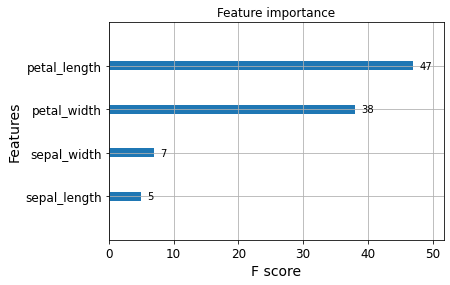

In [11]:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.plot_importance

# Plot importance based on fitted trees
xgb.plot_importance(XGBoost_model)

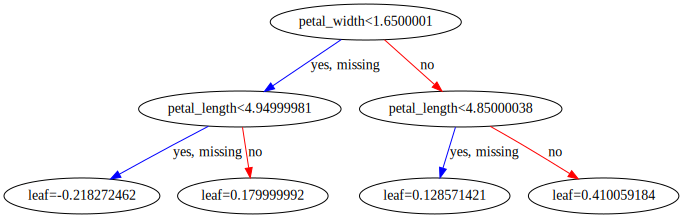

In [12]:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.to_graphviz

# Plot the tree
xgb.to_graphviz(XGBoost_model, num_trees=2)